# Procesamiento de datos utilizando python

##### `Procesamiento numérico`  


>`> Extracción de datos`

In [1]:
# Importando Librerias
import pandas as pd                 #Pandas
import matplotlib.pyplot as plt     #Matplot
import numpy as np                  #Numpy
import seaborn as sns               #seaborn
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow','black','white']

In [2]:
pd.set_option("display.max_rows",4)#Cantidad de filas a mostrar
pd.set_option("display.max_columns",13)#Cantidad de columnas a mostrar

`vistaexaminados y vistaasistencias`

In [3]:
json="https://tecnologica.utec.edu.sv/fica/services/vistaexaminados.php"
dfExam = pd.read_json(json)
dfAsis = pd.read_json('https://tecnologica.utec.edu.sv/fica/services/vistaasistencias.php')
dfAsis

,fecha,codigo,facultad,area,materia,seccion,horario,dias,Inscritos,Asistencia,Modalidad
0,2023-01-19,DPCM1-D,Facultad de Derecho,DERECHO,DERECHO PROCESAL CIVIL Y MERCANTIL I,1,06:30-08:00,Ma-Jue,75,70,EN LINEA
1,2023-01-19,ALG1-E,Facultad de Informática y Ciencias Aplicadas,INFORMATICA,ALGORITMOS I,6,06:30-08:00,Ma-Jue,44,26,PRESENCIAL
...,...,...,...,...,...,...,...,...,...,...,...
9378,2023-03-07,REA1-A,Facultad de Ciencias Sociales,ANTROPOLOGIA,REALIDAD NACIONAL,20,08:00-09:30,Ma-Jue,88,-1,PRESENCIAL
9379,2023-04-11,ALG1-E,Facultad de Informática y Ciencias Aplicadas,INFORMATICA,ALGORITMOS I,1,06:30-08:00,Ma-Jue,88,80,PRESENCIAL


>`> Limpieza de datos`

`vistaasistencias`

In [4]:
dfAsis.info()#sin valores nulos cantidad de registros son 9380 @ columna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9380 entries, 0 to 9379
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   fecha       9380 non-null   object
 1   codigo      9380 non-null   object
 2   facultad    9380 non-null   object
 3   area        9380 non-null   object
 4   materia     9380 non-null   object
 5   seccion     9380 non-null   int64 
 6   horario     9380 non-null   object
 7   dias        9380 non-null   object
 8   Inscritos   9380 non-null   int64 
 9   Asistencia  9380 non-null   int64 
 10  Modalidad   9380 non-null   object
dtypes: int64(3), object(8)
memory usage: 806.2+ KB


In [5]:
# validando que seran utililes las columnas categoricas

cols_cat=['fecha', 'codigo', 'facultad', 'area', 'materia', 'seccion', 'horario',
       'dias', 'Modalidad']
for col in cols_cat:
  print(f'columna {col}: {dfAsis[col].nunique()} subniveles')
#si existiera un solo nivel no nos serviria para analizar pues no habria comparativa por 
#lo que las variables categoricas deben ser mayor a uno, en cambio si tienen demaciados 
#datos dependera como se realice el analisis para que nos sirva

columna fecha: 49 subniveles
columna codigo: 450 subniveles
columna facultad: 4 subniveles
columna area: 9 subniveles
columna materia: 423 subniveles
columna seccion: 26 subniveles
columna horario: 17 subniveles
columna dias: 14 subniveles
columna Modalidad: 2 subniveles


In [7]:
# Validadndo si las columnas numericas 
dfAsis.describe().head(8)#si la desviasion estandar es cero significa que todos los datos son iguales

,seccion,Inscritos,Asistencia
count,9380.000000,9380.000000,9380.000000
mean,2.773134,59.427079,48.705650
std,3.367513,31.304157,26.975018
min,1.000000,1.000000,-1.000000
25%,1.000000,35.000000,28.000000
50%,1.000000,56.000000,45.000000
75%,3.000000,82.000000,68.000000
max,27.000000,140.000000,131.000000


In [6]:
# Validadndo si existen en el dataframe filas repetidas

print(f"tamaño del DF antes de eliminar filas repetidas: {dfAsis.shape}")
dfAsis.drop_duplicates(inplace=True)
print(f'tamaño del DF antes de eliminar filas repetidas: {dfAsis.shape}')

tamaño del DF antes de eliminar filas repetidas: (9380, 11)
tamaño del DF antes de eliminar filas repetidas: (9380, 11)


In [7]:
#haciendo busqueda de un registro; nos damos cuenta que hay registros con espacios en blanco
datos_filtrados = dfAsis[dfAsis['codigo'] == 'EPRO-AC  ']
datos_filtrados

,fecha,codigo,facultad,area,materia,seccion,horario,dias,Inscritos,Asistencia,Modalidad
138,2023-01-19,EPRO-AC,Facultad de Ciencias Sociales,ANTROPOLOGIA,ÉTICA,7,17:00-18:30,Ma-Jue,129,110,EN LINEA
205,2023-01-19,EPRO-AC,Facultad de Ciencias Sociales,ANTROPOLOGIA,ÉTICA,2,06:30-08:00,Ma-Jue,36,0,PRESENCIAL
...,...,...,...,...,...,...,...,...,...,...,...
9224,2023-03-06,EPRO-AC,Facultad de Ciencias Sociales,ANTROPOLOGIA,ÉTICA,8,18:40-20:10,Lu-Mie,128,100,EN LINEA
9315,2023-03-07,EPRO-AC,Facultad de Ciencias Sociales,ANTROPOLOGIA,ÉTICA,2,06:30-08:00,Ma-Jue,36,33,PRESENCIAL


In [4]:
# limpiar espacios en blancos
# Iterarando sobre las columnas del DataFrame
for columna in dfAsis.columns:
    # Verificando si las columnas son de tipo string
    if dfAsis[columna].dtype == 'object':
        # Eliminando los espacios en blanco de cada registro en las columnas coinsidentes
        dfAsis[columna] = dfAsis[columna].str.strip()
datos_filtrados = dfAsis[dfAsis['codigo'] == 'EPRO-AC']
datos_filtrados#Verificando que ya no hayan espacios en blancos

,fecha,codigo,facultad,area,materia,seccion,horario,dias,Inscritos,Asistencia,Modalidad
138,2023-01-19,EPRO-AC,Facultad de Ciencias Sociales,ANTROPOLOGIA,ÉTICA,7,17:00-18:30,Ma-Jue,129,110,EN LINEA
205,2023-01-19,EPRO-AC,Facultad de Ciencias Sociales,ANTROPOLOGIA,ÉTICA,2,06:30-08:00,Ma-Jue,36,0,PRESENCIAL
...,...,...,...,...,...,...,...,...,...,...,...
9224,2023-03-06,EPRO-AC,Facultad de Ciencias Sociales,ANTROPOLOGIA,ÉTICA,8,18:40-20:10,Lu-Mie,128,100,EN LINEA
9315,2023-03-07,EPRO-AC,Facultad de Ciencias Sociales,ANTROPOLOGIA,ÉTICA,2,06:30-08:00,Ma-Jue,36,33,PRESENCIAL


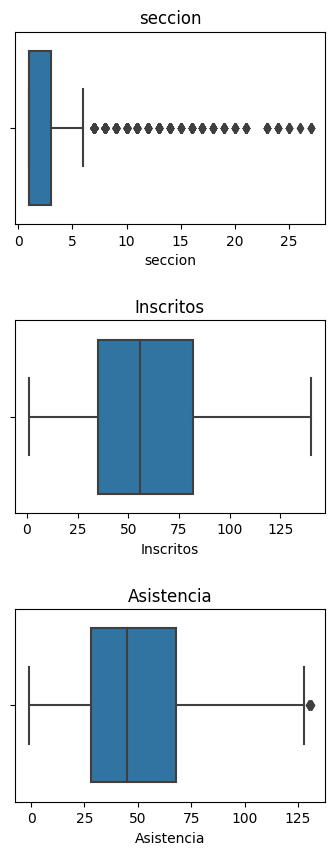

In [6]:
#validando valores extremos de las columnas numericas

cols_num=['seccion', 'Inscritos', 'Asistencia']
fig, ax=plt.subplots(nrows=3,ncols=1,figsize=(4,10))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col,data=dfAsis,ax=ax[i])
    ax[i].set_title(col)

In [7]:
# Eliminando valores mayores a 130 usando el "outler"

print(f"tamaño del DF antes de eliminar filas repetidas: {dfAsis.shape}")
dfAsis=dfAsis[dfAsis['Asistencia']<=130]
print(f'tamaño del DF antes de eliminar filas repetidas: {dfAsis.shape}')
#9380 rows - 9378 rows = 2 rows eliminados por ser mayores a 130

tamaño del DF antes de eliminar filas repetidas: (9380, 11)
tamaño del DF antes de eliminar filas repetidas: (9378, 11)


In [9]:
#Seccionando todos los datos unicos para tener una mejor visualizacion
transAsis = dfAsis['Asistencia']
registros_unicos = sorted(transAsis.drop_duplicates())  # Verificando registros únicos

secciones = [registros_unicos[i:i+50] for i in range(0, len(registros_unicos), 50)]

for i, seccion in enumerate(secciones):
    print(f"Sección {i+1}:")
    print(seccion)
    print('---')

Sección 1:
[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]
---
Sección 2:
[49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98]
---
Sección 3:
[99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 130]
---


In [10]:
transColums=dfAsis.columns
transColums#mostrando columnas actuales

Index(['fecha', 'codigo', 'facultad', 'area', 'materia', 'seccion', 'horario',
       'dias', 'Inscritos', 'Asistencia', 'Modalidad'],
      dtype='object')

In [27]:
# utilizando el método rename para cambiar el nombre de las columnas
# dfAsis.rename(columns={"Inscritos": "inscritos", "Asistencia": "asistencia", "Modalidad": "modalidad"}, inplace=True)

dfAsis_copy = dfAsis.copy()
dfAsis_copy.rename(columns={"Inscritos": "inscritos", "Asistencia": "asistencia", "Modalidad": "modalidad"}, inplace=True)

# imprime los nombres de las columnas actualizadas
print(dfAsis.columns)

Index(['fecha', 'codigo', 'facultad', 'area', 'materia', 'seccion', 'horario',
       'dias', 'Inscritos', 'Asistencia', 'Modalidad', 'inasistencia'],
      dtype='object')


In [11]:
transFact=dfAsis.facultad
list(transFact.drop_duplicates())#virificando registros unicos

['Facultad de Derecho',
 'Facultad de Informática y Ciencias Aplicadas',
 'Facultad de Ciencias Empresariales',
 'Facultad de Ciencias Sociales']

In [12]:
# creando un diccionario para mapear los nombres antiguos y cambiarlos a los nuevos
mapeo_Fac = {"Facultad de Derecho": "Fac_Der", 
            "Facultad de Informática y Ciencias Aplicadas": "Fac_InCa",
            "Facultad de Ciencias Empresariales": "Fac_CiEmp",
            "Facultad de Ciencias Sociales": "Fac_CiSo"
            }
# utilizando el método replace para cambiar los nombres de los registros
dfAsis.loc[:, "facultad"] = dfAsis["facultad"].replace(mapeo_Fac)
# dfAsis["facultad"] = dfAsis["facultad"].replace(mapeo_Fac)

# mostrar la columna actualizada
print(dfAsis["facultad"])

0        Fac_Der
1       Fac_InCa
          ...   
9378    Fac_CiSo
9379    Fac_InCa
Name: facultad, Length: 9378, dtype: object


In [13]:
# dfExam['facultad']# comprobando datos en las columnas
dfAsis# comprobando datos en las columnas

,fecha,codigo,facultad,area,materia,seccion,horario,dias,Inscritos,Asistencia,Modalidad
0,2023-01-19,DPCM1-D,Fac_Der,DERECHO,DERECHO PROCESAL CIVIL Y MERCANTIL I,1,06:30-08:00,Ma-Jue,75,70,EN LINEA
1,2023-01-19,ALG1-E,Fac_InCa,INFORMATICA,ALGORITMOS I,6,06:30-08:00,Ma-Jue,44,26,PRESENCIAL
...,...,...,...,...,...,...,...,...,...,...,...
9378,2023-03-07,REA1-A,Fac_CiSo,ANTROPOLOGIA,REALIDAD NACIONAL,20,08:00-09:30,Ma-Jue,88,-1,PRESENCIAL
9379,2023-04-11,ALG1-E,Fac_InCa,INFORMATICA,ALGORITMOS I,1,06:30-08:00,Ma-Jue,88,80,PRESENCIAL


In [14]:
# Contar el número de fechas para cada combinación de código, horario y sección
fecha_counts = dfAsis.groupby(['codigo', 'horario', 'seccion'])['fecha'].nunique()

# Filtrar los registros en los que hay más de una fecha
indices_a_eliminar = fecha_counts[fecha_counts == 1].index

# Eliminar los registros correspondientes a las combinaciones de código, horario y sección con una única fecha
dfAsis = dfAsis[~dfAsis.set_index(['codigo', 'horario', 'seccion']).index.isin(indices_a_eliminar)]

# Mostrar el DataFrame resultante
dfAsis
#9378 rows - 9364 rows = 14 rows eliminados por ser unicos

,fecha,codigo,facultad,area,materia,seccion,horario,dias,Inscritos,Asistencia,Modalidad
0,2023-01-19,DPCM1-D,Fac_Der,DERECHO,DERECHO PROCESAL CIVIL Y MERCANTIL I,1,06:30-08:00,Ma-Jue,75,70,EN LINEA
1,2023-01-19,ALG1-E,Fac_InCa,INFORMATICA,ALGORITMOS I,6,06:30-08:00,Ma-Jue,44,26,PRESENCIAL
...,...,...,...,...,...,...,...,...,...,...,...
9378,2023-03-07,REA1-A,Fac_CiSo,ANTROPOLOGIA,REALIDAD NACIONAL,20,08:00-09:30,Ma-Jue,88,-1,PRESENCIAL
9379,2023-04-11,ALG1-E,Fac_InCa,INFORMATICA,ALGORITMOS I,1,06:30-08:00,Ma-Jue,88,80,PRESENCIAL


In [15]:
#Seccionando todos los datos unicos para tener una mejor visualizacion
transAsis = dfAsis['Asistencia']
registros_unicos = sorted(transAsis.drop_duplicates())  # Verificando registros únicos

secciones = [registros_unicos[i:i+50] for i in range(0, len(registros_unicos), 50)]

for i, seccion in enumerate(secciones):
    print(f"Sección {i+1}:")
    print(seccion)
    print('---')

Sección 1:
[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]
---
Sección 2:
[49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98]
---
Sección 3:
[99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 130]
---


In [52]:
json="https://tecnologica.utec.edu.sv/fica/services/vistaexaminados.php"
dfExam = pd.read_json(json)
dfAsis = pd.read_json('https://tecnologica.utec.edu.sv/fica/services/vistaasistencias.php')

In [ ]:
# eliminando los registros en los que el valor de 'Asistencia' sea mayor 
# que el valor de 'Inscritos' Ó el valor de 'Inscritos' sea menor al 90% 
# del valor de 'Asistencia "6890 filas"

dfAsis = dfAsis.drop(dfAsis[(dfAsis['Asistencia'] > dfAsis['Inscritos']) | (dfAsis['Inscritos'] 
        < 0.9 * dfAsis['Asistencia'])].index)

dfAsis


>`> Transformación de datos`

In [58]:
# transExam=dfExam.area
# list(transExam.drop_duplicates())
#evaluacion, tipo,examinados, asistencia

`vistaasistencias`

In [16]:
# Definimos el umbral del valor que vamos a sustituir
umbral = 5

# agrupando los datos del DataFrame dfAsis según las columnas 'codigo', 'horario' y 'dias' 
# y luego calculamos la media y hacemos redondeo en la columna 'Asistencia' dentro de cada 
# grupo.
media_asistencias = dfAsis.groupby(['codigo', 'horario', 'dias'])['Asistencia'].mean().round()


# Iterar sobre cada fila del DataFrame
for index, row in dfAsis.iterrows():
    codigo = row['codigo']
    horario = row['horario']
    dias = row['dias']
    asistencia = row['Asistencia']
    inscritos = row['Inscritos']

    # Verificar si el valor está dentro del umbral
    if asistencia < umbral:
        # Verificar si cumple las condiciones de código, horario y días
        if (codigo, horario, dias) in media_asistencias.index:
            # Calcular la media de asistencias para el código, horario y días específicos
            media = media_asistencias[(codigo, horario, dias)]
            
            # Sustituir el valor dentro del umbral por la media de asistencias
            dfAsis.at[index, 'Asistencia'] = media
        else:
            # No se encontró la combinación de código, horario y días en las medias calculadas
            # No se realiza ninguna sustitución
            pass

    # Verificar si la asistencia es mayor que los inscritos
    if asistencia > inscritos:
        # Obtener la asistencia más alta dentro del rango de opciones anteriores
        asistencia_maxima = dfAsis[(dfAsis['codigo'] == codigo) & (dfAsis['horario'] == horario) & (dfAsis['dias'] == dias)]['Asistencia'].max()
        
        # Sustituir el valor de asistencia por la asistencia máxima
        dfAsis.at[index, 'Asistencia'] = asistencia_maxima
dfAsis

,fecha,codigo,facultad,area,materia,seccion,horario,dias,Inscritos,Asistencia,Modalidad
0,2023-01-19,DPCM1-D,Fac_Der,DERECHO,DERECHO PROCESAL CIVIL Y MERCANTIL I,1,06:30-08:00,Ma-Jue,75,70,EN LINEA
1,2023-01-19,ALG1-E,Fac_InCa,INFORMATICA,ALGORITMOS I,6,06:30-08:00,Ma-Jue,44,26,PRESENCIAL
...,...,...,...,...,...,...,...,...,...,...,...
9378,2023-03-07,REA1-A,Fac_CiSo,ANTROPOLOGIA,REALIDAD NACIONAL,20,08:00-09:30,Ma-Jue,88,78,PRESENCIAL
9379,2023-04-11,ALG1-E,Fac_InCa,INFORMATICA,ALGORITMOS I,1,06:30-08:00,Ma-Jue,88,80,PRESENCIAL


In [17]:
#Seccionando todos los datos unicos para tener una mejor visualizacion
transAsis = dfAsis['Asistencia']
registros_unicos = sorted(transAsis.drop_duplicates())  # Verificando registros únicos

secciones = [registros_unicos[i:i+50] for i in range(0, len(registros_unicos), 50)]

for i, seccion in enumerate(secciones):
    print(f"Sección {i+1}:")
    print(seccion)
    print('---')

Sección 1:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
---
Sección 2:
[51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
---
Sección 3:
[101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 130]
---


In [39]:
# Calcular la columna de Inasistencia
dfAsis = dfAsis.assign(inasistencia=dfAsis['Inscritos'] - dfAsis['Asistencia'])
# dfAsis.loc[:, 'inasistencia'] = dfAsis['inscritos'] - dfAsis['asistencia']

# dfAsis['inasistencia'] = dfAsis['inscritos'] - dfAsis['asistencia']

# Mostrar el DataFrame resultante
dfAsis



,fecha,codigo,facultad,area,materia,seccion,horario,dias,Inscritos,Asistencia,Modalidad,inasistencia
0,2023-01-19,DPCM1-D,Fac_Der,DERECHO,DERECHO PROCESAL CIVIL Y MERCANTIL I,1,06:30-08:00,Ma-Jue,75,70.0,EN LINEA,5.0
1,2023-01-19,ALG1-E,Fac_InCa,INFORMATICA,ALGORITMOS I,6,06:30-08:00,Ma-Jue,44,26.0,PRESENCIAL,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9378,2023-03-07,REA1-A,Fac_CiSo,ANTROPOLOGIA,REALIDAD NACIONAL,20,08:00-09:30,Ma-Jue,88,78.0,PRESENCIAL,10.0
9379,2023-04-11,ALG1-E,Fac_InCa,INFORMATICA,ALGORITMOS I,1,06:30-08:00,Ma-Jue,88,80.0,PRESENCIAL,8.0


In [36]:
#Seccionando todos los datos unicos para tener una mejor visualizacion
transAsis = dfAsis['inasistencia']
registros_unicos = sorted(transAsis.drop_duplicates())  # Verificando registros únicos

secciones = [registros_unicos[i:i+50] for i in range(0, len(registros_unicos), 50)]

for i, seccion in enumerate(secciones):
    print(f"Sección {i+1}:")
    print(seccion)
    print('---')

Sección 1:
[-27, -21, -10, -9, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
---
Sección 2:
[42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 69, 72, 76, 92, 93]
---


In [37]:
# Verificar si la asistencia es mayor a los inscritos y sustituir el valor
#AUN POR VALIDAR
for index, row in dfAsis.iterrows():
    codigo = row['codigo']
    horario = row['horario']
    dias = row['dias']
    asistencia = row['Asistencia']
    inscritos = row['Inscritos']
    
    if asistencia > inscritos:
        # Verificar si el código corresponde con el día y horario específico
        media_asistencias = dfAsis[(dfAsis['codigo'] == codigo) & (dfAsis['horario'] == horario) & (dfAsis['dias'] == dias)]['Asistencia'].mean()
        if not pd.isnull(media_asistencias):
            # Sustituir el valor de asistencia por la media
            dfAsis.at[index, 'Asistencia'] = media_asistencias

# Mostrar el dataframe modificado
dfAsis

,fecha,codigo,facultad,area,materia,seccion,horario,dias,Inscritos,Asistencia,Modalidad,inasistencia
0,2023-01-19,DPCM1-D,Fac_Der,DERECHO,DERECHO PROCESAL CIVIL Y MERCANTIL I,1,06:30-08:00,Ma-Jue,75,70.0,EN LINEA,5
1,2023-01-19,ALG1-E,Fac_InCa,INFORMATICA,ALGORITMOS I,6,06:30-08:00,Ma-Jue,44,26.0,PRESENCIAL,18
...,...,...,...,...,...,...,...,...,...,...,...,...
9378,2023-03-07,REA1-A,Fac_CiSo,ANTROPOLOGIA,REALIDAD NACIONAL,20,08:00-09:30,Ma-Jue,88,78.0,PRESENCIAL,10
9379,2023-04-11,ALG1-E,Fac_InCa,INFORMATICA,ALGORITMOS I,1,06:30-08:00,Ma-Jue,88,80.0,PRESENCIAL,8


>`> Estadísticas generadas`

`vistaasistencias`

###### 01- ¿Comportamiento de la asistencia en los estudiantes por facultad?
###### 02- ¿Cuál es la relación entre la asistencia y el número de estudiantes inscritos en cada materia?
###### 03- ¿Cuál es la cantidad promedio de estudiantes inscritos por área?
###### 04- ¿Cuál es la proporción de estudiantes que asisten en cada modalidad de enseñanza?
###### 05- ¿Cuál es la distribución de la cantidad de estudiantes faltantes por materia?
###### 06- ¿Cuál es la relación entre el número de estudiantes inscritos y la cantidad de estudiantes faltantes en cada materia?
###### 07- ¿Cuál es el promedio de asistencia por facultad?
###### 08- ¿Cuál es la distribución de la asistencia en cada día de la semana?
###### 09- ¿Cuál es la variación de la asistencia a lo largo de diferentes horarios?
###### 10- ¿Cuál es la distribución de la asistencia por sección?

>`> Presentación de resultados` 

`vistaasistencias`

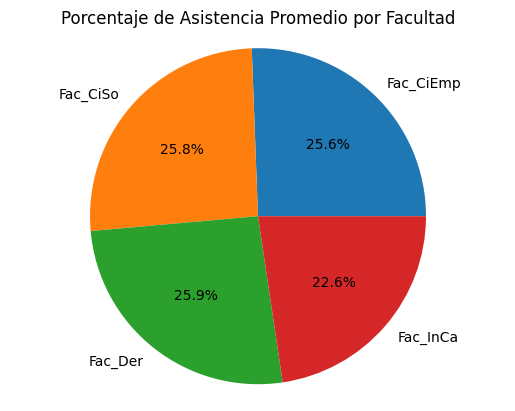

In [65]:
# Gráfico de pastel de la asistencia agrupados por facultad
asistencia_promedio_facultad = dfAsis.groupby('facultad')['asistencia'].mean()

plt.pie(asistencia_promedio_facultad, labels=asistencia_promedio_facultad.index, 
        autopct='%1.1f%%')
plt.title('Porcentaje de Asistencia Promedio por Facultad')
plt.axis('equal')
plt.show()

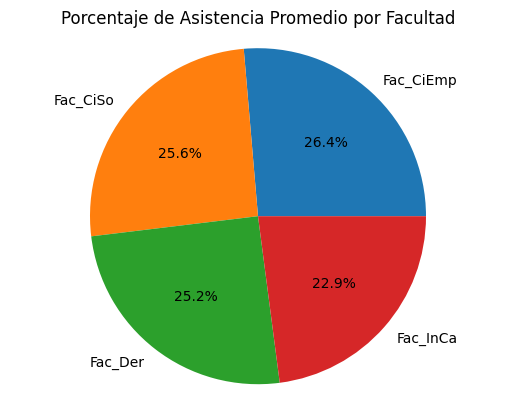

In [29]:
# Gráfico de pastel de la asistencia agrupados por facultad
asistencia_promedio_facultad = dfAsis.groupby('facultad')['Asistencia'].mean()

plt.pie(asistencia_promedio_facultad, labels=asistencia_promedio_facultad.index, 
        autopct='%1.1f%%')
plt.title('Porcentaje de Asistencia Promedio por Facultad')
plt.axis('equal')
plt.show()

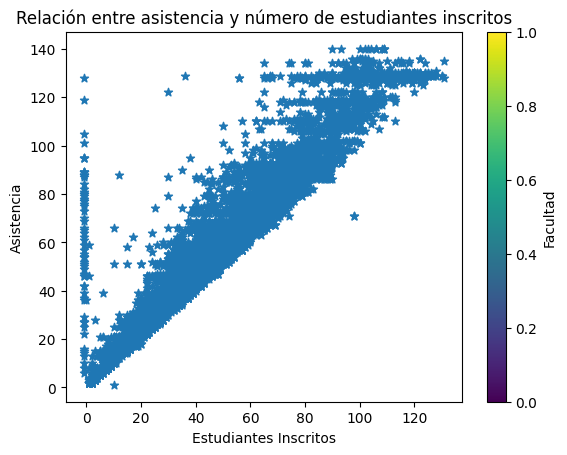

In [17]:
# Gráfico de dispersión de asistencia vs. estudiantes inscritos
plt.scatter(dfAsis['asistencia'], dfAsis['inscritos'],marker="*")
plt.xlabel('Estudiantes Inscritos')
plt.ylabel('Asistencia')
plt.title('Relación entre asistencia y número de estudiantes inscritos')
plt.colorbar(label='Facultad')
plt.show()

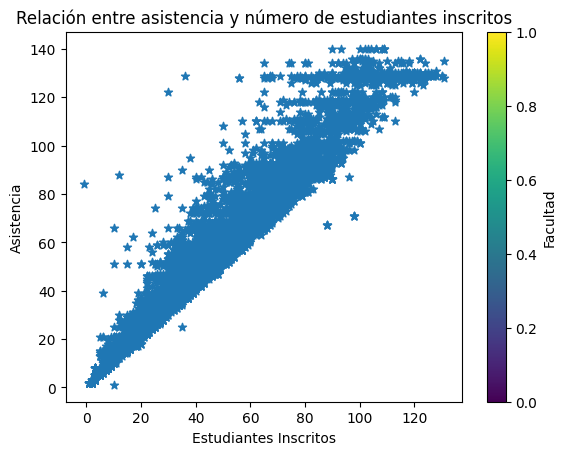

In [57]:
# Gráfico de dispersión de asistencia vs. estudiantes inscritos
plt.scatter(dfAsis['asistencia'], dfAsis['inscritos'],marker="*")
plt.xlabel('Estudiantes Inscritos')
plt.ylabel('Asistencia')
plt.title('Relación entre asistencia y número de estudiantes inscritos')
plt.colorbar(label='Facultad')
plt.show()

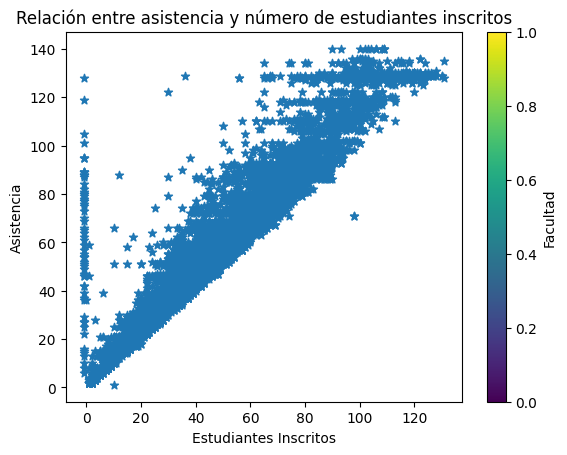

In [6]:
# Gráfico de dispersión de asistencia vs. estudiantes inscritos
plt.scatter(dfAsis['asistencia'], dfAsis['inscritos'],marker="*")
plt.xlabel('Estudiantes Inscritos')
plt.ylabel('Asistencia')
plt.title('Relación entre asistencia y número de estudiantes inscritos')
plt.colorbar(label='Facultad')
plt.show()

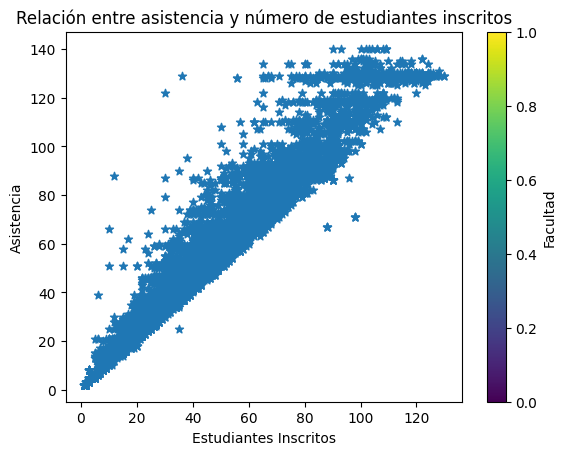

In [31]:
# Gráfico de dispersión de asistencia vs. estudiantes inscritos
plt.scatter(dfAsis['Asistencia'], dfAsis['Inscritos'],marker="*")
plt.xlabel('Estudiantes Inscritos')
plt.ylabel('Asistencia')
plt.title('Relación entre asistencia y número de estudiantes inscritos')
plt.colorbar(label='Facultad')
plt.show()

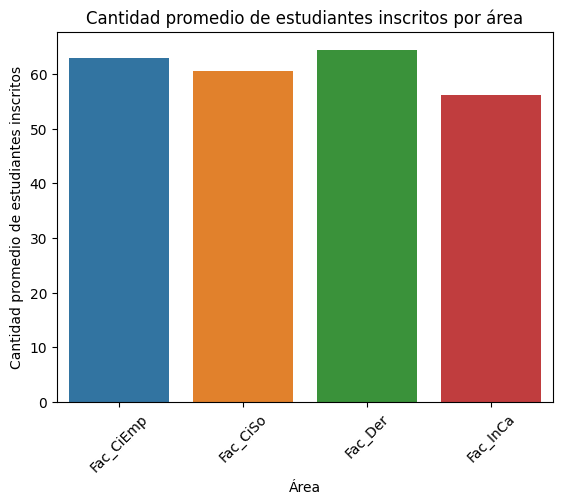

In [34]:
# Gráfico de barras de la cantidad promedio de estudiantes inscritos por área
area_avg_inscritos = dfAsis.groupby('area')['Inscritos'].mean()
sns.barplot(x=area_avg_inscritos.index, y=area_avg_inscritos.values)
plt.xlabel('Área')
plt.ylabel('Cantidad promedio de estudiantes inscritos')
plt.title('Cantidad promedio de estudiantes inscritos por área')
plt.xticks(rotation=45)
plt.show()

> ### `EXPORTACIÓN DE DATOS`

In [35]:
#dfExam.to_csv('exam_sinIndices.csv',sep=";",index=False,encoding="utf-8")#crea un archivo CSV EXPORTANDO el trabajo de limpieza de la BD
dfAsis.to_csv('Asis_sinIndices.csv',sep=";",index=False,encoding="utf-8")#crea un archivo CSV EXPORTANDO el trabajo de limpieza de la BD